In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "/Users/loubrauchli/Documents/Python_Projects/Project_Football_Analytics_FCHERRLIBERG/output_video_match/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

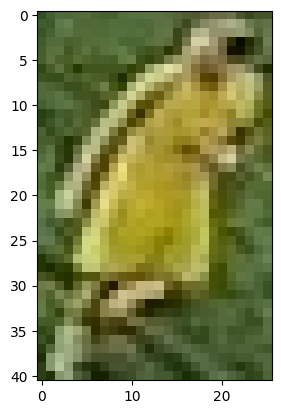

In [4]:
plt.imshow(image)
plt.show()

# Take top half of the image

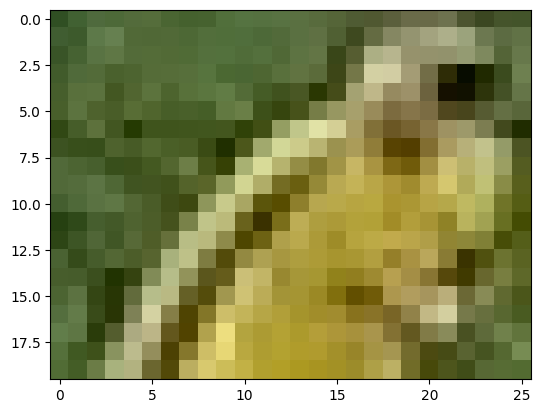

In [5]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

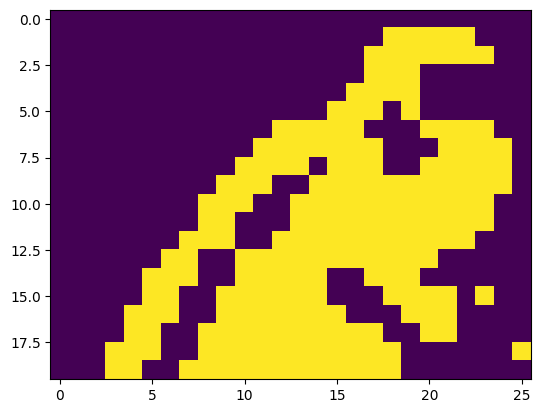

In [13]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels in the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [20]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

0


In [21]:
player_cluster = 1-non_player_cluster
print(player_cluster)

1


In [22]:
kmeans.cluster_centers_[player_cluster]

array([172.39408867, 162.43842365,  87.19211823])